# Carbonate membership functions

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

In [49]:
def plot_fuzzy_curve(bathy,law,label,color='b'):
    fig, ax0 = plt.subplots(figsize=(8, 4))
    ax0.plot(bathy, law, color, linewidth=3, label=label)
    lg = ax0.legend(loc=4)
    lg.draw_frame(False)
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.xlabel('Depth [m]')
    plt.ylabel('Fuzzy value')
    plt.show()
    return

def plot_fuzzy_curve2(bathy,law,label,color='b'):
    fig, ax0 = plt.subplots(figsize=(8, 4))
    ax0.plot(bathy, law, color, linewidth=3, label=label)
    lg = ax0.legend(loc=1)
    lg.draw_frame(False)
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.xlabel('Wave height [m]')
    plt.ylabel('Fuzzy value')
    plt.show()
    return

## Relation irradiance, depth and production

Carbonates are composed of elements from diverse origine, from benthic species squeleton to ooides. The relation between production rate and irradiance is often consider crucial and requires to define each species according to 3 classes:

- **euphotic species** depends on photosynthesis such as green algae, corals, rudists
- **oligophotic species** which require light but in smaller amount such as foraminifera or red algae
- **pelagic species** species not dependent on light such as molluscs, crinoids, brachiopods.

For euphotic and oligophotic species, production rate depends on the irradiance. The irradiance decreases exponentially with depth following the Beer-Lambert curve:

$$ I(d) = I_0 e^{-d/D_o} $$

where $I$ is the irradience for a depth $d$, $I_o$ is the irradiance at the water surface and $D_0$ the depth of light intensity decrease (from 1 to 30 m). The value of $D_0$ depends of water turbidity. 

<div align="center">
    <img width=500 src="images/fuzDepth.png" alt="depth influence" title="production rate depth profile."</img>
</div>

_Typical production rate profile for shallow, open-marine production and pelagic sedimentation (adapted from [**Warrlich et al., 2002** - Basin Research])._

In [26]:
depth = np.linspace(0.0, 70.0, num=281, endpoint=True)

### Euphotic species

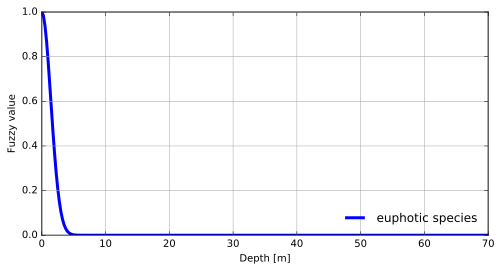

In [29]:
# Species parameters
shallow_depth_sigma = 2
shallow = fuzz.gaussmf(depth, 0, shallow_depth_sigma)

# Visualise fuzzy production curve
plot_fuzzy_curve(depth,shallow,'euphotic species')

### Oligophotic species

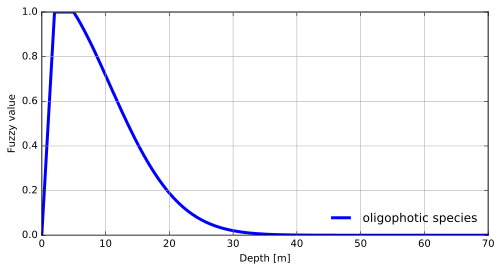

In [23]:
# Species parameters
zt = 2.
zb = 5.
mid_depth_sigma = 15.

# Define production curve below zb
mdepth = fuzz.gaussmf(depth, 0, mid_depth_sigma)
id = np.where(depth>=zb)[0]
pt = id[0]
factor = 1.
if mdepth[pt] > 0. and mdepth[pt]<=1.:
    factor = 1./mdepth[pt]
mdepth = mdepth*factor    
mdepth[mdepth>1] = 1.

# Define production curve above zt
tri = fuzz.trimf(depth, [0, zt, zb])
id = np.where(depth<zt)[0]
mdepth[id] = tri[id]

# Visualise fuzzy production curve
plot_fuzzy_curve(depth,mdepth,'oligophotic species')

### Pelagic species

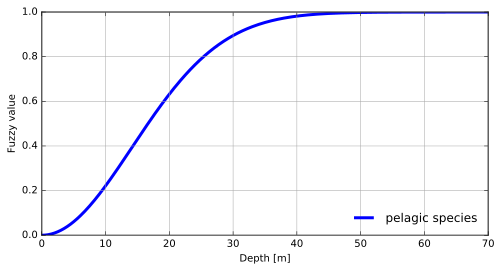

In [24]:
# Species parameters
pelagic_depth_sigma = 20
pelagic = 1.-fuzz.gaussmf(depth, 0, pelagic_depth_sigma)

# Visualise fuzzy production curve
plot_fuzzy_curve(depth,pelagic,'pelagic species')

## Relation wave height and production rate 

In [56]:
wave_height = np.linspace(0.0, 5.0, num=81, endpoint=True)

### Trapezoidal function

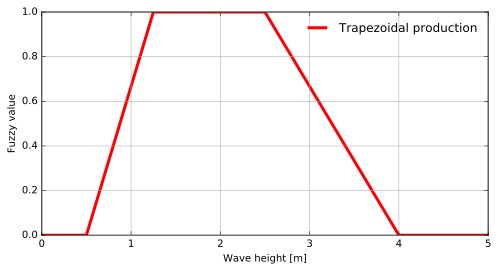

In [81]:
# Species parameters
a = 0.5
b = 1.25
c = 2.5
d = 4.
wave0 = fuzz.trapmf(wave_height, [a, b, c, d])

# Visualise fuzzy production curve
plot_fuzzy_curve2(wave_height,wave0,'Trapezoidal production','r')

### Bell function

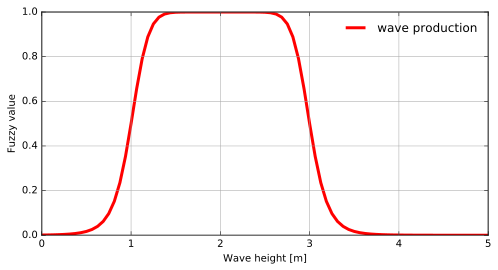

In [59]:
# Species parameters
a = 1.
b = 5
c = 2.
wave1 = fuzz.gbellmf(wave_height, a, b, c)

# Visualise fuzzy production curve
plot_fuzzy_curve2(wave_height,wave1,'bell production','r')

### Gaussian type function

15


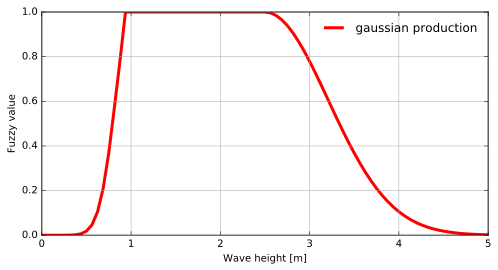

In [79]:
# Species parameters
shallow_wave_sigma = 1
wave2 = fuzz.gaussmf(wave_height, 2.5, shallow_wave_sigma)
shallow_wave_sigma2 = 0.25
wave3 = fuzz.gaussmf(wave_height, 1., shallow_wave_sigma2)

id1 = np.where(wave_height<1.)[0]
id2 = np.where(wave_height>2.5)[0]

wave2[id1[-1]:id2[0]] = 1.
wave2[:id1[-1]] = wave3[:id1[-1]]

# Visualise fuzzy production curve
plot_fuzzy_curve2(wave_height,wave2,'gaussian production','r')